## The primary objective is to gain insight into our transactions and how this knowledge can guide our business. Understanding the customer base and where the most opportunity lies is the key to successfully grow.



# Import Library & Read Dataset

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers

# Read and Explore Data

In [3]:
df = pd.read_csv("C:/Users/D/Downloads/Sample-Superstore/Sample-Superstore.csv",encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
#Check df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df['Profitability'] = df['Profit']/df['Sales']

<AxesSubplot:xlabel='Country', ylabel='count'>

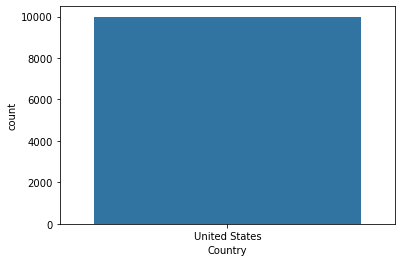

In [6]:
sns.countplot(data = df, x = 'Country')

In [31]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [32]:
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month
df['OrderD']=df['Order Date'].dt.day

In [9]:
df.drop(['Row ID','Order ID','Customer ID','Country','Postal Code','Order Date','Ship Date','Product ID'],axis=1,inplace=True)
df

,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitability,OrderY,OrderM,OrderD
0,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,2016,11,8
1,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,2016,11,8
2,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,2016,6,12
3,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,2015,10,11
4,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,2015,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Tom Boeckenhauer,Consumer,Miami,Florida,South,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,0.1625,2014,1,21
9990,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,0.1700,2017,2,26
9991,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,0.0750,2017,2,26
9992,Standard Class,Dave Brooks,Consumer,Costa Mesa,California,West,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,0.4500,2017,2,26


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   City           9994 non-null   object 
 4   State          9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Category       9994 non-null   object 
 7   Sub-Category   9994 non-null   object 
 8   Product Name   9994 non-null   object 
 9   Sales          9994 non-null   float64
 10  Quantity       9994 non-null   int64  
 11  Discount       9994 non-null   float64
 12  Profit         9994 non-null   float64
 13  Profitability  9994 non-null   float64
 14  OrderY         9994 non-null   int64  
 15  OrderM         9994 non-null   int64  
 16  OrderD         9994 non-null   int64  
dtypes: float64(4), int64(4), object(9)
memory usage: 1.3

In [11]:
#Separating Categorical & Numerical Values
cats = [ 'Segment', 'Region', 'City','Category','Sub-Category','Ship Mode','State']
nums = ['Sales', 'Quantity', 'Discount', 'Profit','Profitability','OrderY','OrderM','OrderD']

In [12]:
df.sample(10)

,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profitability,OrderY,OrderM,OrderD
3044,Second Class,Benjamin Patterson,Consumer,Troy,Ohio,East,Technology,Phones,Cisco Unified IP Phone 7945G VoIP phone,1022.970,5,0.4,-255.7425,-0.250000,2015,4,30
1443,Standard Class,Shaun Chance,Corporate,Aurora,Colorado,West,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",139.424,4,0.2,17.4280,0.125000,2015,10,1
434,Standard Class,Mike Kennedy,Consumer,Jacksonville,Florida,South,Office Supplies,Binders,Insertable Tab Post Binder Dividers,4.812,2,0.7,-3.6892,-0.766667,2014,12,19
9713,Standard Class,Maribeth Dona,Consumer,Philadelphia,Pennsylvania,East,Technology,Accessories,Sony 16GB Class 10 Micro SDHC R40 Memory Card,51.560,5,0.2,-6.4450,-0.125000,2014,11,5
6531,Standard Class,Theone Pippenger,Consumer,Rochester,Minnesota,Central,Office Supplies,Art,Newell 310,8.800,5,0.0,2.5520,0.290000,2017,12,4
7148,Standard Class,Christy Brittain,Consumer,Long Beach,New York,East,Office Supplies,Appliances,Bionaire 99.97% HEPA Air Cleaner,52.560,3,0.0,18.3960,0.350000,2016,6,12
2137,Standard Class,Trudy Brown,Consumer,Grand Prairie,Texas,Central,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,3.656,4,0.8,-5.8496,-1.600000,2015,12,31
6850,Standard Class,Jack O'Briant,Corporate,Franklin,Wisconsin,Central,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1565.880,6,0.0,407.1288,0.260000,2016,1,8
1707,Standard Class,Jamie Kunitz,Consumer,San Francisco,California,West,Technology,Phones,Geemarc AmpliPOWER60,148.480,2,0.2,16.7040,0.112500,2017,10,30
745,Standard Class,Sung Shariari,Consumer,Dallas,Texas,Central,Office Supplies,Supplies,"Fiskars 8"" Scissors, 2/Pack",55.168,4,0.2,6.2064,0.112500,2016,8,27


In [13]:
#Describe Categorical Values
df[cats].describe().T

,count,unique,top,freq
Segment,9994,3,Consumer,5191
Region,9994,4,West,3203
City,9994,531,New York City,915
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523
Ship Mode,9994,4,Standard Class,5968
State,9994,49,California,2001


In [14]:
#Describe Numerical Values
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.9400,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.0000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.2000,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.3640,8399.976
Profitability,9994.0,0.120314,0.466754,-2.750,0.07500,0.2700,0.3625,0.500
OrderY,9994.0,2015.722233,1.123555,2014.000,2015.00000,2016.0000,2017.0000,2017.000
OrderM,9994.0,7.809686,3.284654,1.000,5.00000,9.0000,11.0000,12.000
OrderD,9994.0,15.468481,8.748327,1.000,8.00000,15.0000,23.0000,31.000


# Primary Data Insights & Visualization

<AxesSubplot:>

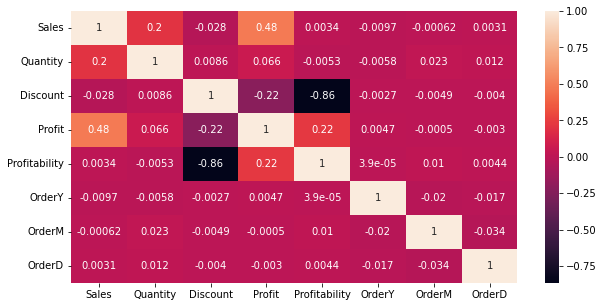

In [15]:
#Heatmap Correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='Sales', ylabel='Discount'>

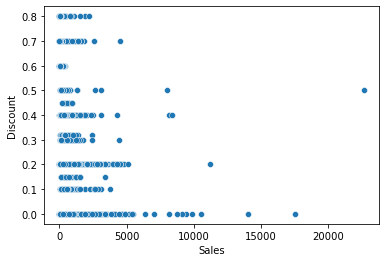

In [4]:
sns.scatterplot(data=df,x = 'Sales',y='Discount')

## 'Profitability' & 'Discount' are strongly negative correlated and doesn't affect the 'Sales' that means that Dicounts are poorly placed or not targeted to the right segment.

Next, the profit metric shall be broken down into several other categories and analyzed on a per transaction basis:

    -Region
    -State
    -Category
    -Sub-Category
    -Segment

For each segment the mean and median values are considered.

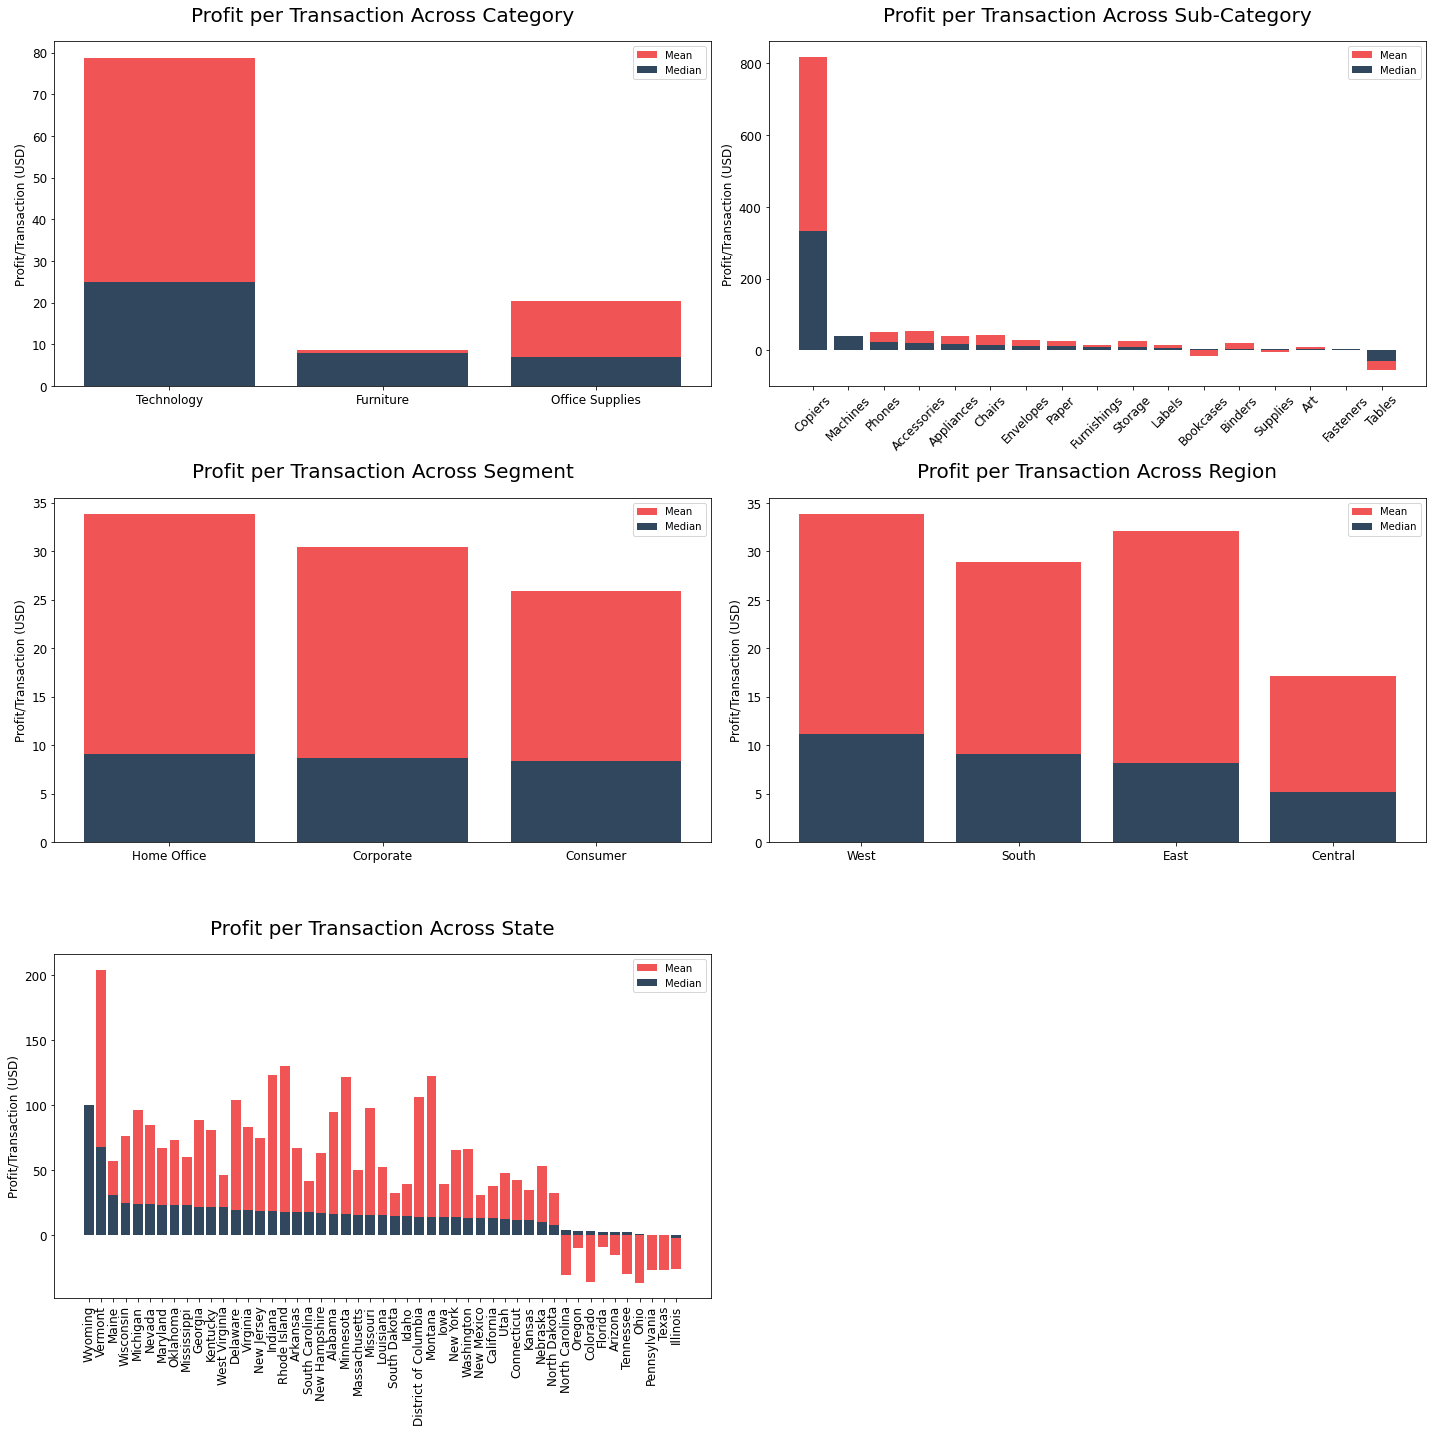

In [218]:
plt.figure(figsize=[20,20])
metrics = ['Category','Sub-Category','Segment','Region','State']
col='Profit'
i=1
for metric in metrics:
    subdf = df[[metric,col]]
    subdfmean = pd.DataFrame(columns = [metric,'Profit Mean','Profit Median'])
    for val in subdf[metric].unique():   
        #print(region)
        myMean = subdf[subdf[metric]==val][col].mean()
        myMedian = subdf[subdf[metric]==val][col].median()
        subdfmean = subdfmean.append({metric:val, 'Profit Mean': myMean,'Profit Median':myMedian},ignore_index = True)
    subdfmean.sort_values('Profit Median',inplace = True, ascending = False )
    plt.subplot(3,2,i)
    plt.bar(x=subdfmean[metric], height=subdfmean['Profit Mean'], color='#F05454')
    plt.bar(x=subdfmean[metric], height=subdfmean['Profit Median'], color='#30475E')
    plt.ylabel('Profit/Transaction (USD)',size = 'large')
    if len(subdf[metric].unique()) > 20:
        plt.xticks(rotation='vertical')
    elif len(subdf[metric].unique()) > 10:
        plt.xticks(rotation=45)
    plt.xticks(size = 'large')
    plt.yticks(size = 'large')
    plt.title(f"Profit per Transaction Across {metric}", size=20, pad=20)
    plt.legend(['Mean','Median'])
    i+=1
plt.tight_layout()

### Per transaction basis can help guide with what sectors or regions provide the greatest return on investment. Additionally considering the median values likely in this case holds a greater value are there a several high value transactions that lead to signficant skew.

### However total sales and profits must be analzyed similarly to place these transactions into the proper context.

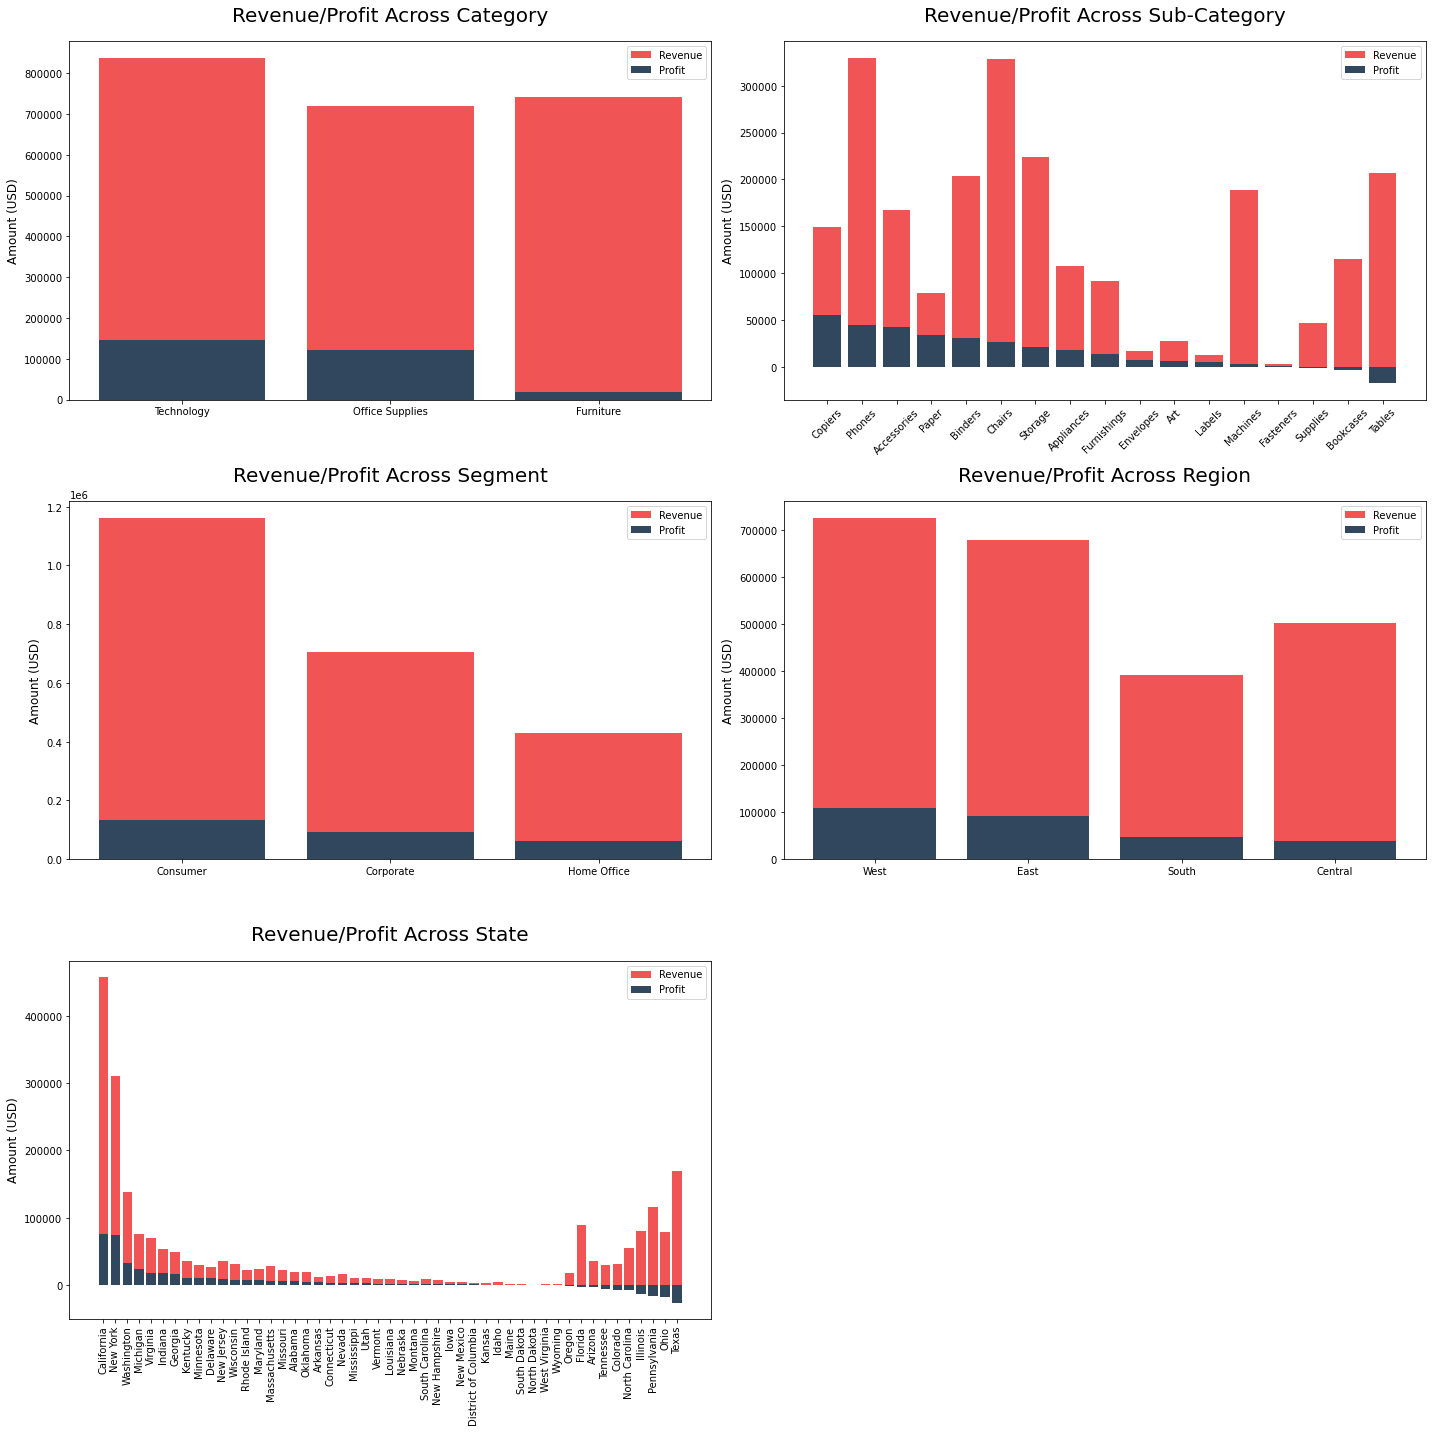

In [219]:
plt.figure(figsize=[20,20])
metrics = ['Category','Sub-Category','Segment','Region','State']
i=1
for metric in metrics:
    subdf = df[[metric,'Profit','Sales']]
    subdftotal = pd.DataFrame(columns = [metric,'Profit Mean','Profit Median'])
    for val in subdf[metric].unique():   
        #print(region)
        profit = subdf[subdf[metric]==val]['Profit'].sum()
        revenue = subdf[subdf[metric]==val]['Sales'].sum()
        subdftotal = subdftotal.append({metric:val, 'Profit': profit,'Revenue':revenue},ignore_index = True)
    subdftotal.sort_values('Profit',inplace = True, ascending = False )
    plt.subplot(3,2,i)
    plt.bar(x=subdftotal[metric], height=subdftotal['Revenue'], color='#F05454')
    plt.bar(x=subdftotal[metric], height=subdftotal['Profit'], color='#30475E')
    plt.ylabel('Amount (USD)',size = 'large')
    if len(subdftotal[metric].unique()) > 20:
        plt.xticks(rotation='vertical')
    elif len(subdftotal[metric].unique()) > 10:
        plt.xticks(rotation=45)
    #plt.xticks(size = 'large')
    #plt.yticks(size = 'large')
    plt.title(f"Revenue/Profit Across {metric}", size=20, pad=20)
    plt.legend(['Revenue','Profit'])
    i+=1
plt.tight_layout()

From this point we can identify that 'Tech' sales both generate the most profit/transaction and the most profit total for our company. Furniture while a large revenue source does not provide a signficant profit/transaction.

High population centers naturally drive the majority of our business (CA, NY). The states which we may wish to focus our business attention on are those with strong revenue but low or negative profits such as Pennsylvania and Texas.

## - What is the most Profitable States ?

<AxesSubplot:xlabel='State'>

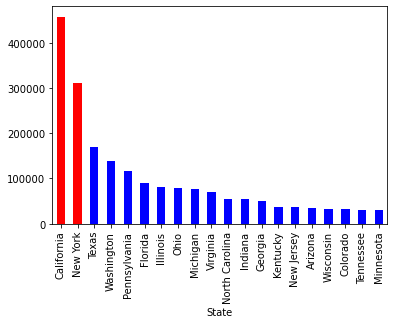

In [20]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='State'>

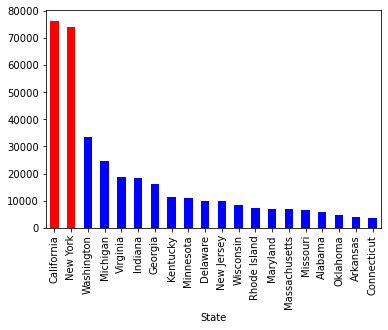

In [21]:
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

## Two important states are New York and California. New York is more profitable than California.

In [7]:
def type(x):
    if x <0:
        return 'red'
    else:
        return 'black'
df['BlackOrRed']= df['Profit'].apply(type)

In [34]:
df_cal=df[df['State']=='California']
df_new=df[df['State']=='New York']

In [56]:
df.groupby('Customer Name')['Segment'].agg(lambda x:x.value_counts().index[0])

Customer Name
Aaron Bergman            Consumer
Aaron Hawkins           Corporate
Aaron Smayling          Corporate
Adam Bellavance       Home Office
Adam Hart               Corporate
                         ...     
Xylona Preis             Consumer
Yana Sorensen           Corporate
Yoseph Carroll          Corporate
Zuschuss Carroll         Consumer
Zuschuss Donatelli       Consumer
Name: Segment, Length: 793, dtype: object

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

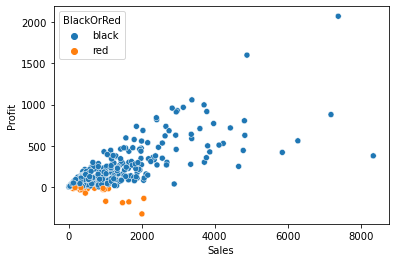

In [57]:
df_cal_customer=pd.DataFrame(df_cal.groupby('Customer Name')['Sales'].sum())
df_cal_customer['Profit']=pd.DataFrame(df_cal.groupby('Customer Name')['Profit'].sum())
df_cal_customer['OrderM']=pd.DataFrame(df_cal.groupby('Customer Name')['OrderM'].median())
df_cal_customer['Segment']=pd.DataFrame(df.groupby('Customer Name')['Segment'].agg(lambda x:x.value_counts().index[0]))


df_cal_customer['BlackOrRed'] = df_cal_customer['Profit'].apply(type)


sns.scatterplot(data=df_cal_customer, hue='BlackOrRed',x='Sales',y='Profit')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

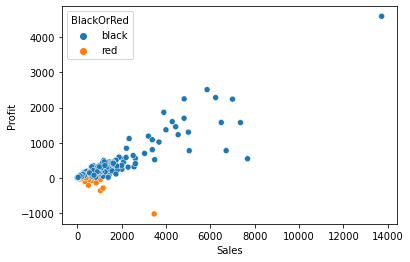

In [27]:
df_new_customer=pd.DataFrame(df_new.groupby('Customer Name')['Sales'].sum())
df_new_customer['Profit']=pd.DataFrame(df_new.groupby('Customer Name')['Profit'].sum())

df_new_customer['BlackOrRed'] = df_new_customer['Profit'].apply(type)


sns.scatterplot(data=df_new_customer, hue='BlackOrRed',x='Sales',y='Profit')

## New York has a outstanding customer which is high sales and profit.

In [26]:
df_new_customer.sort_values(by=['Sales'],ascending=False).head()

,Sales,Profit,BlackOrRed
Customer Name,,,
Tom Ashbrook,13723.498,4599.2073,black
Peter Fuller,7678.228,543.2819,black
Seth Vernon,7359.918,1571.7964,black
Tom Boeckenhauer,6999.960,2239.9872,black
Greg Tran,6712.744,774.7935,black


## 'Tom Ashbrook' contributes a lot to high profitability of New York.

In [27]:
#Sales and Profit of California
df_cal_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,577.0,793.219465,1089.711102,3.984,110.0120,387.136,1059.0880,8341.2900
Profit,577.0,132.376754,210.395948,-325.572,18.4527,63.621,147.1346,2069.6196


In [28]:
#Sales and Profit of Newyork
df_new_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,415.0,749.099448,1345.445710,3.6400,70.21400,311.4220,795.3050,13723.4980
Profit,415.0,178.406141,413.540179,-1027.4035,15.13285,56.6044,172.9244,4599.2073


In [29]:
#Sales and Profit of New York without 'Tom Ashbrook'
df_new_noTom=df_new_customer[df_new_customer.index != 'Tom Ashbrook']
df_new_noTom.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,414.0,717.760321,1185.762163,3.6400,70.213000,310.89300,789.35200,7678.2280
Profit,414.0,167.727878,352.128496,-1027.4035,15.129825,56.51905,172.26315,2510.8903


## If New York does not have 'Tom Ashbook', their average sales goes down from 749 to 717,and their average profit goes down from 178 to 167.But New York is still more profitable than California.

## - Are there any difference among states in profitability ?

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

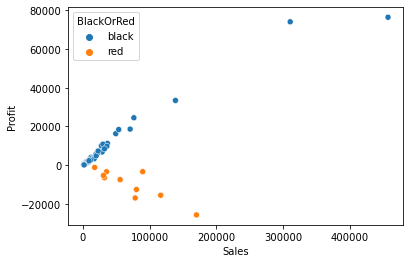

In [11]:
df_state = pd.DataFrame(df.groupby('State')['Sales'].sum())
df_state['Profit']=df.groupby('State')['Profit'].sum()

df_state['BlackOrRed']= df_state['Profit'].apply(type)

sns.scatterplot(data=df_state,x='Sales',y='Profit',hue='BlackOrRed')

## - Calefornia Most Profitable Products ?

<AxesSubplot:xlabel='Category', ylabel='Profit'>

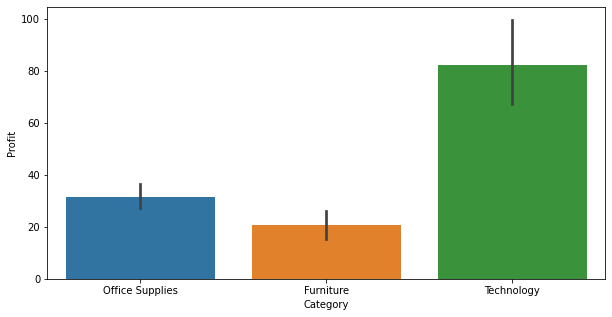

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_cal,y='Profit',x='Category')

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

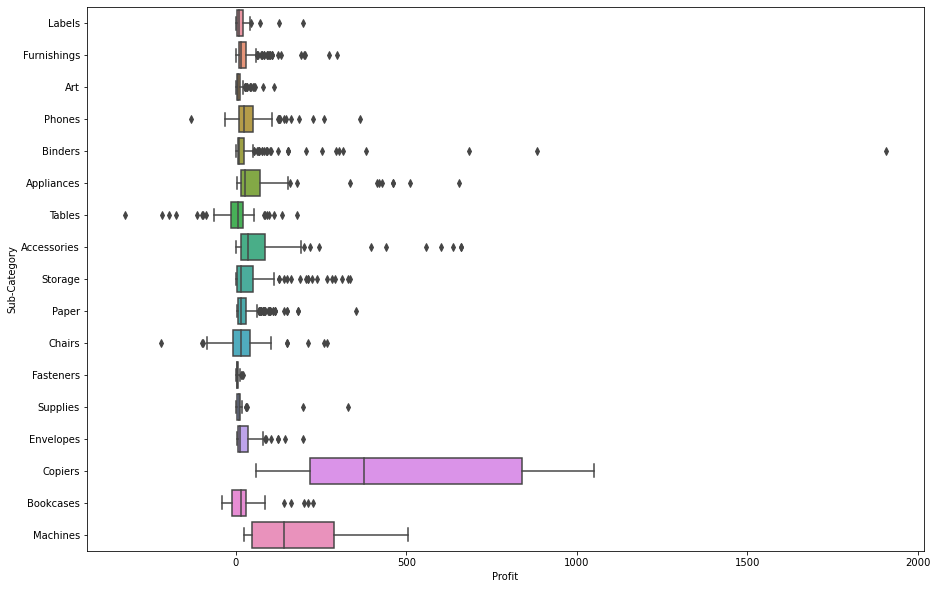

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_cal,x='Profit',y='Sub-Category')

In [33]:
df_cal.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

Sub-Category
Accessories    11095.6565
Binders        10002.1537
Paper           7977.5395
Copiers         7889.8519
Storage         7204.1372
Appliances      6992.2318
Phones          6309.1197
Furnishings     5611.5606
Machines        4175.4087
Chairs          2435.9715
Art             1614.8365
Envelopes       1529.4161
Bookcases       1418.9915
Labels          1370.1191
Supplies         862.2003
Fasteners        195.7505
Tables          -303.5580
Name: Profit, dtype: float64

## 'Accessories' & 'Binders' are the Most Profitable in California While 'Tables' are making the company lose Money

## - NewYork Most Profitable Products ?

<AxesSubplot:xlabel='Category', ylabel='Profit'>

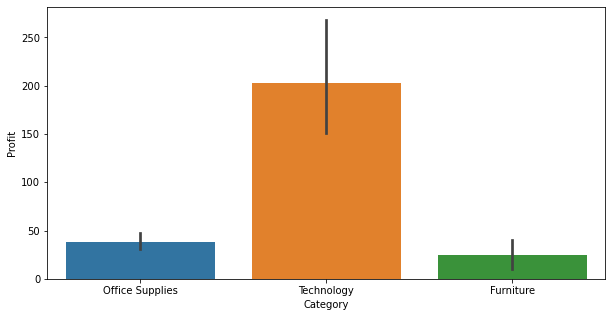

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_new,y='Profit',x='Category')

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

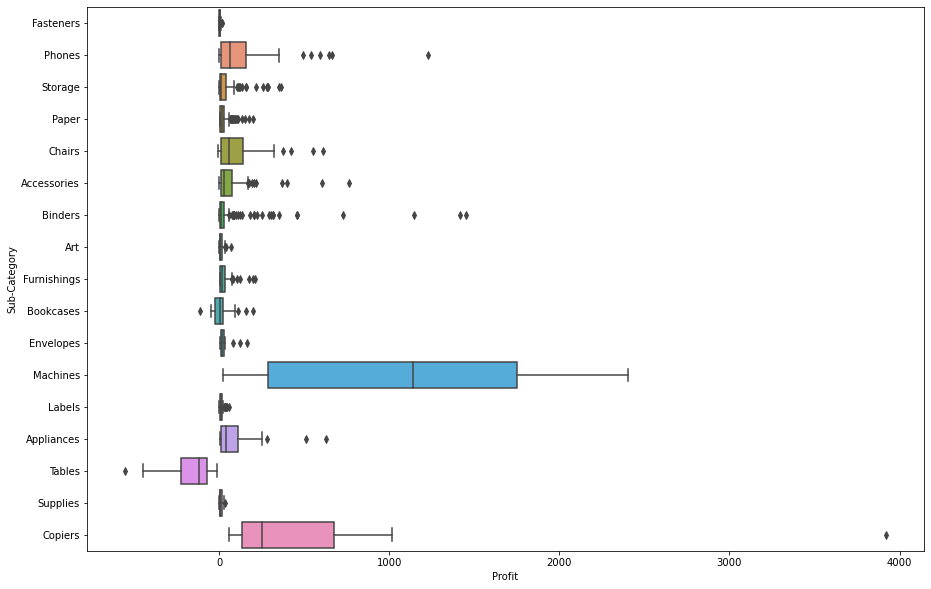

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_new,x='Profit',y='Sub-Category')

In [36]:
df_new.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

Sub-Category
Machines       17320.0762
Phones         13399.1892
Binders        11096.0260
Chairs          7111.0119
Copiers         5839.9500
Accessories     5627.5702
Storage         4338.2179
Paper           4023.0799
Appliances      3807.7645
Furnishings     2931.4346
Art              902.0926
Envelopes        831.0267
Labels           611.1723
Bookcases        350.8744
Supplies         268.0359
Fasteners        116.6671
Tables         -4535.6408
Name: Profit, dtype: float64

## 'Machines' & 'Phones' & 'Binders' are the Most Profitable in NewYork as the Technology     Category is most profitable While 'Tables' are making the company lose Money

## --> It appears that 'Tables' are making losses in the profitable States 

# - What is the most Profitable Cities ?

<AxesSubplot:xlabel='City'>

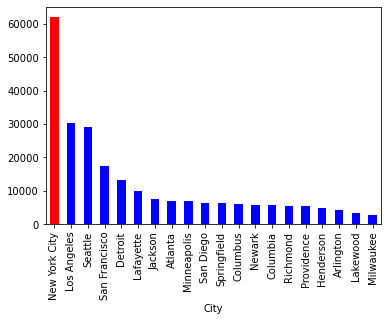

In [37]:
colors = ['red', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

<AxesSubplot:xlabel='City'>

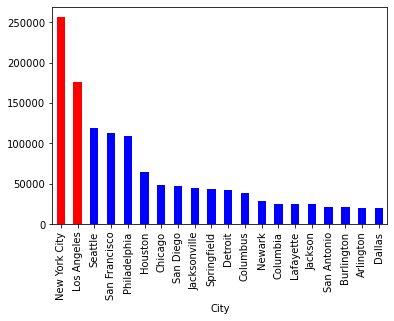

In [38]:
colors = ['red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue',
         'blue', 'blue', 'blue', 'blue','blue','blue','blue','blue','blue','blue']
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(20).plot.bar(color=colors)

## New York City Profitability is reMarkable.

In [14]:
df_los=df[df['City']=='Los Angeles']
df_New=df[df['City']=='New York City']

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

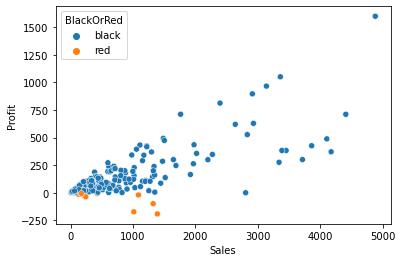

In [17]:
df_los_customer=pd.DataFrame(df_los.groupby('Customer Name')['Sales'].sum())
df_los_customer['Profit']=pd.DataFrame(df_los.groupby('Customer Name')['Profit'].sum())

df_los_customer['BlackOrRed'] = df_los_customer['Profit'].apply(type)


sns.scatterplot(data=df_los_customer, hue='BlackOrRed',x='Sales',y='Profit')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

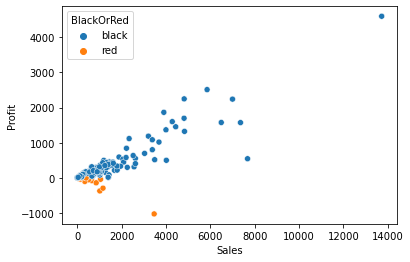

In [26]:
df_New_customer=pd.DataFrame(df_New.groupby('Customer Name')['Sales'].sum())
df_New_customer['Profit']=pd.DataFrame(df_New.groupby('Customer Name')['Profit'].sum())

df_New_customer['BlackOrRed'] = df_New_customer['Profit'].apply(type)


sns.scatterplot(data=df_New_customer, hue='BlackOrRed',x='Sales',y='Profit')

# We can divide cities to 'Black Cities' and 'Red Cities' where red cities are causing losses.

In [43]:
df[df['Profit']<0]['Segment'].value_counts()

Consumer       1003
Corporate       556
Home Office     312
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

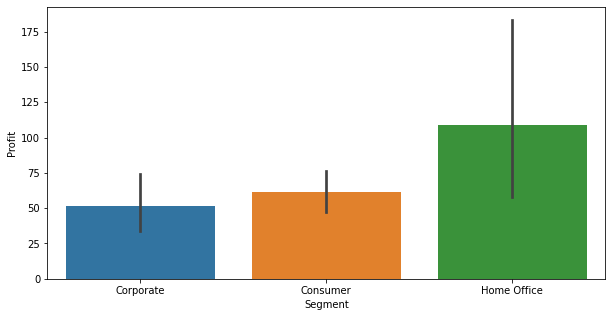

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_new,y='Profit',x='Segment')

# Home Office Segment is most profitable segment overall

<AxesSubplot:xlabel='Segment', ylabel='OrderM'>

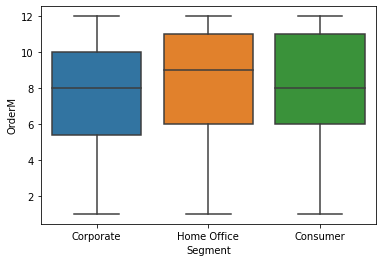

In [58]:
sns.boxplot(data = df_cal_customer, x = 'Segment', y = 'OrderM')

## Month 11 in California doesn't include Corprates so we rather focus our marketing in November on Consumer and Home Office

In [481]:
df['OrderY'].value_counts()

2017    3312
2016    2587
2015    2102
2014    1993
Name: OrderY, dtype: int64

In [65]:
outliers_indices = detect_outliers(df, 0,['Profit'])
len(outliers_indices)
df.drop(outliers_indices , inplace = True)

<AxesSubplot:xlabel='State'>

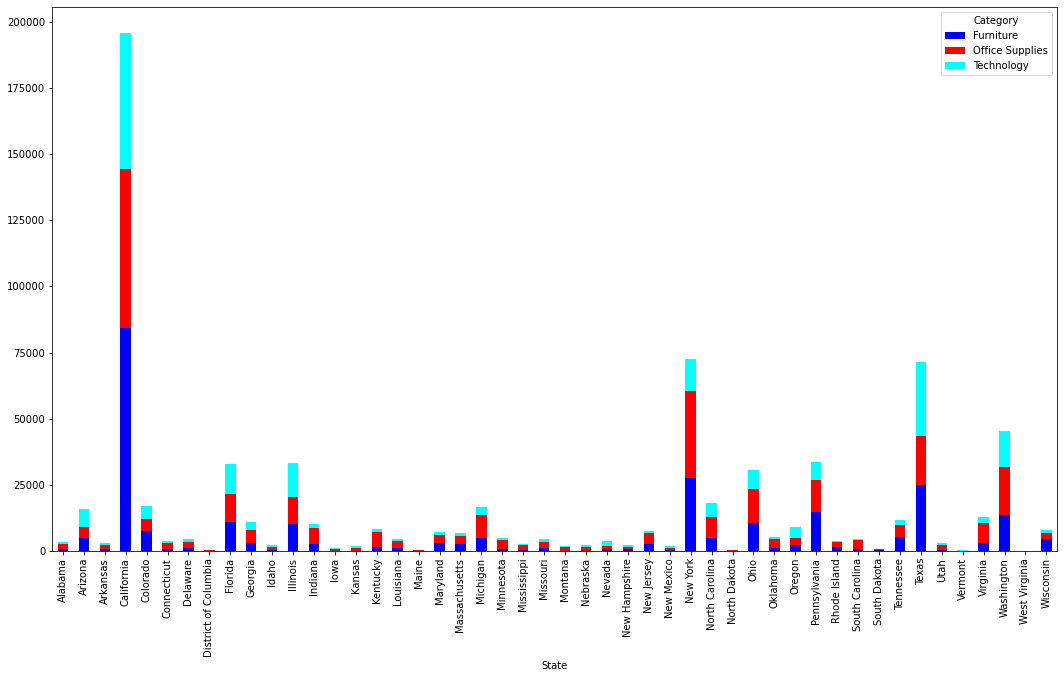

In [67]:
df.groupby(by=["State","Category"])['Sales'].sum().reset_index().pivot(index="State", columns='Category', values='Sales').plot(kind='bar', color=["blue","red","cyan"],figsize=(18,10),stacked=True)


# THE BEST AND WORST PRODUCT WHICH IS SOLD

In [69]:
print("The best Product : {}".format(df.groupby(by=["Product Name"],as_index=True)['Sales'].sum().sort_values(ascending=False).index[0]))
print("With sum sales = {}".format(df.groupby(by=["Product Name"])['Sales'].sum().sort_values(ascending=False)[0]))

print("\nThe worst Product: {}".format(df.groupby(by=["Product Name"],as_index=True)['Sales'].sum().sort_values(ascending=False).index[-1]))
print("With sum sales = {}".format(df.groupby(by=["Product Name"])['Sales'].sum().sort_values(ascending=False)[-1]))


The best Product : HON 5400 Series Task Chairs for Big and Tall
With sum sales = 6729.408

The worst Product: Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac
With sum sales = 1.624


# Some Basic insights

In [111]:
df['Product Name'].value_counts()

Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                  1
Name: Prod

In [112]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          616
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [114]:
df['Region'].value_counts()

West       3203
East       2847
Central    2323
South      1620
Name: Region, dtype: int64

In [115]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64

In [33]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64